In [4]:

import pandas as pd 
from sklearn.svm import SVR 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,RandomTreesEmbedding, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [5]:
#df = pd.read_csv('heart.csv')
df = pd.read_csv('/content/drive/MyDrive/Final Project/heart.csv')

# Checking datatypes and null values

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

# Assigning X and Y variables

In [10]:
X = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

# Since we have an unbalanced y, we will stratify our y when splitting the data after scaling our X variable

In [11]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [12]:

scaler = StandardScaler()


X = scaler.fit_transform(X)

In [13]:
X_train, X_test,y_train,y_test = train_test_split(X,y, 
                                                  test_size =.20,
                                                  random_state=0, 
                                                  stratify=y)

In [14]:
def build_clf(unit):

  ann=Sequential()
  ann.add(Dense(units=unit, activation = 'relu', input_shape=(12,)))
  ann.add(Dense(units=unit, activation = 'relu'))

  
  ann.add(Dense(units=1,activation='sigmoid'))
  ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return ann

from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=build_clf)

<ipython-input-14-2f553e6d3307>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_clf)


In [15]:
from sklearn.model_selection import GridSearchCV 

params= { 'batch_size':[8,16,32,64],
         'nb_epoch': [30,50,100,110,120,130,140,150], 
         'unit':[18,20,24,28,32,36,40]
}

In [16]:
grid_search = GridSearchCV(estimator=model,param_grid=params,verbose=3)

grid_search = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
6/6 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6875
[CV 1/5] END batch_size=8, nb_epoch=30, unit=18;, score=0.688 total time=   6.1s
6/6 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.5833
[CV 2/5] END batch_size=8, nb_epoch=30, unit=18;, score=0.583 total time=   0.7s
6/6 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.7292
[CV 3/5] END batch_size=8, nb_epoch=30, unit=18;, score=0.729 total time=   0.7s
6/6 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.3750
[CV 4/5] END batch_size=8, nb_epoch=30, unit=18;, score=0.375 total time=   0.8s
6/6 [==============================] - 0s 3ms/step - loss: 0.7386 - accuracy: 0.5532
[CV 5/5] END batch_size=8, nb_epoch=30, unit=18;, score=0.553 total time=   0.7s
6/6 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.6042
[CV 1/5] END batch_si

3/3 [==============================] - 0s 4ms/step - loss: 0.7502 - accuracy: 0.3750
[CV 4/5] END batch_size=16, nb_epoch=30, unit=18;, score=0.375 total time=   0.7s
12/12 [==============================] - 0s 2ms/step - loss: 0.7405 - accuracy: 0.3854


3/3 [==============================] - 0s 4ms/step - loss: 0.7087 - accuracy: 0.5106
[CV 5/5] END batch_size=16, nb_epoch=30, unit=18;, score=0.511 total time=   0.6s
3/3 [==============================] - 0s 4ms/step - loss: 0.7040 - accuracy: 0.5833
[CV 1/5] END batch_size=16, nb_epoch=30, unit=20;, score=0.583 total time=   0.7s
3/3 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.6667
[CV 2/5] END batch_size=16, nb_epoch=30, unit=20;, score=0.667 total time=   0.7s
3/3 [==============================] - 0s 4ms/step - loss: 0.6780 - accuracy: 0.6667
[CV 3/5] END batch_size=16, nb_epoch=30, unit=20;, score=0.667 total time=   1.0s
3/3 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.5833
[CV 4/5] END batch_size=16, nb_epoch=30, unit=20;, score=0.583 total time=   0.7s
3/3 [==============================] - 0s 4ms/step - loss: 0.8315 - accuracy: 0.3830
[CV 5/5] END batch_size=16, nb_epoch=30, unit=20;, score=0.383 total time=   0.6

1/1 [==============================] - 0s 119ms/step - loss: 0.6398 - accuracy: 0.6042
[CV 4/5] END batch_size=64, nb_epoch=30, unit=18;, score=0.604 total time=   0.7s


1/1 [==============================] - 0s 107ms/step - loss: 0.8639 - accuracy: 0.3191
[CV 5/5] END batch_size=64, nb_epoch=30, unit=18;, score=0.319 total time=   0.6s
1/1 [==============================] - 0s 109ms/step - loss: 0.9048 - accuracy: 0.3125
[CV 1/5] END batch_size=64, nb_epoch=30, unit=20;, score=0.312 total time=   0.6s
1/1 [==============================] - 0s 130ms/step - loss: 0.7559 - accuracy: 0.4375
[CV 2/5] END batch_size=64, nb_epoch=30, unit=20;, score=0.438 total time=   1.0s
1/1 [==============================] - 0s 104ms/step - loss: 0.6723 - accuracy: 0.6250
[CV 3/5] END batch_size=64, nb_epoch=30, unit=20;, score=0.625 total time=   0.6s
1/1 [==============================] - 0s 107ms/step - loss: 0.6466 - accuracy: 0.5625
[CV 4/5] END batch_size=64, nb_epoch=30, unit=20;, score=0.562 total time=   0.7s
1/1 [==============================] - 0s 101ms/step - loss: 0.6730 - accuracy: 0.5957
[CV 5/5] END batch_size=64, nb_epoch=30, unit=20;, score=0.596 total

In [17]:
best_parameters = grid_search.best_params_ 
best_score = grid_search.best_score_ 

print('Best Parameters ', best_parameters)
print('Best Score',best_score)

Best Parameters  {'batch_size': 8, 'nb_epoch': 120, 'unit': 40}
Best Score 0.7196808457374573


In [39]:
y_pred = grid_search.predict(X_test)

y_pred = y_pred>0.5

from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_test,y_pred)


print(classification_report(y_test,y_pred))

2/2 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        41
           1       0.86      0.32      0.46        19

    accuracy                           0.77        60
   macro avg       0.81      0.65      0.66        60
weighted avg       0.79      0.77      0.73        60



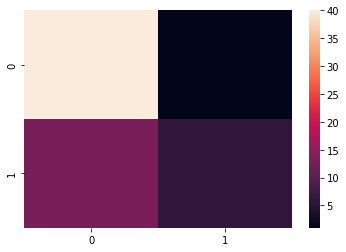

In [41]:
tt = confusion_matrix(y_test,y_pred)
sns.heatmap(tt)

# Creating the parameters for our models 

In [18]:
log_clf = LogisticRegression(solver='lbfgs',
                             multi_class='multinomial', 
                             max_iter = 10000)

rnd_clf = RandomForestClassifier(criterion='entropy',
                                 max_features='sqrt')


svm_clf= SVC(gamma='auto',probability = True, C=10,kernel = 'rbf')

dt_clf = DecisionTreeClassifier(criterion='gini',
                                splitter='best')

In [19]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Initializing the Voting Classifier

In [20]:
voting_clf = VotingClassifier( 
    estimators=[('lr',log_clf),
                ('rf',rnd_clf),
                ('sv',svm_clf),
                ('dt',dt_clf)],  
                voting = 'hard')


In [21]:
voting_clf.fit(X_train,y_train)
x = voting_clf.score(X_test,y_test)

0.8666666666666667

In [44]:
x = voting_clf.score(X_test,y_test)

In [22]:
#Testing to see if the model is overfitting, which it is


voting_clf.score(X_train,y_train)

0.9916317991631799

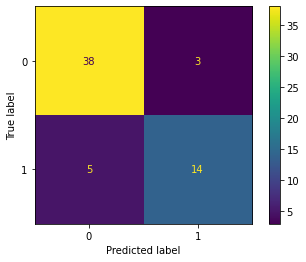

In [23]:
y_pred_vote = voting_clf.predict(X_test)
cmd = confusion_matrix(y_test,y_pred_vote)
disp = ConfusionMatrixDisplay(confusion_matrix=cmd, 
                              display_labels=voting_clf.classes_)
disp.plot()

plt.show()

# Initializing the Bagging Classifier, but using our voting ensemble as the model

In [24]:
bag_clf = BaggingClassifier(voting_clf, 
           n_estimators=500, 
           max_samples = .8, 
           oob_score=True,
           random_state=0)

In [25]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=VotingClassifier(estimators=[('lr',
                                                               LogisticRegression(max_iter=10000,
                                                                                  multi_class='multinomial')),
                                                              ('rf',
                                                               RandomForestClassifier(criterion='entropy',
                                                                                      max_features='sqrt')),
                                                              ('sv',
                                                               SVC(C=10,
                                                                   gamma='auto',
                                                                   probability=True)),
                                                              ('dt',
                                                          

In [26]:

bag_clf.score(X_train,y_train)

0.9874476987447699

In [50]:
bagscore = bag_clf.score(X_test,y_test)

# Again, overfitting our data



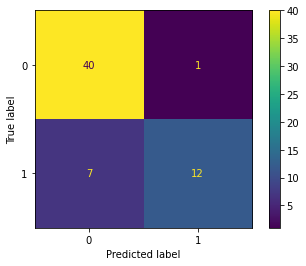

In [28]:
y_pred_bag = bag_clf.predict(X_test)
cmd = confusion_matrix(y_test,y_pred_bag)
disp = ConfusionMatrixDisplay(confusion_matrix=cmd, 
                              display_labels=bag_clf.classes_)
disp.plot()

plt.show()

# Testing Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier 
grd_clf = GradientBoostingClassifier(n_estimators=50,
                                     learning_rate=1,
                                     random_state=0)
grd_clf.fit(X_train,y_train)
grdscore = grd_clf.score(X_test,y_test)

In [30]:
#Overfitting
grd_clf.score(X_train,y_train)

1.0

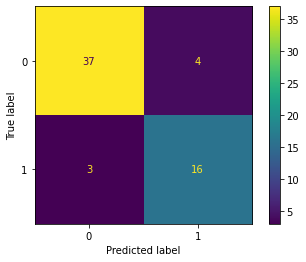

In [31]:
y_pred_grd = grd_clf.predict(X_test)
cmd = confusion_matrix(y_test,y_pred_grd)
disp = ConfusionMatrixDisplay(confusion_matrix=cmd, 
                              display_labels=grd_clf.classes_)
disp.plot()

plt.show()

# Testing Ada Boosting Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=500, random_state=0, 
                             learning_rate=1)

ada_clf.fit(X_train,y_train)


AdaBoostClassifier(learning_rate=1, n_estimators=500, random_state=0)

In [47]:
adascore = ada_clf.score(X_test,y_test)

In [34]:
ada_clf.score(X_train,y_train)

1.0

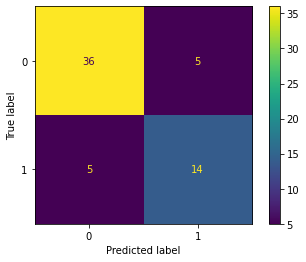

In [35]:
y_pred_ada = ada_clf.predict(X_test)
cmd = confusion_matrix(y_test,y_pred_ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cmd, 
                              display_labels=ada_clf.classes_)
disp.plot()

plt.show()

# Creating our report from our models we have used

In [36]:
from numpy.core.arrayprint import format_float_scientific 
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

for clf in(log_clf,rnd_clf,svm_clf,voting_clf,ada_clf,grd_clf,bag_clf):
  clf.fit(X_train,y_train) 
  y_pred = clf.predict(X_test)
  clf_df = clf.__class__.__name__,accuracy_score(y_test,y_pred)
  print(clf_df)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse) 
  r2 = r2_score(y_test, y_pred)
  print("Results of sklearn.metrics:")
  print("MAE:",mae)
  print("MSE:", mse)
  print("RMSE:", rmse)
  print("R-Squared:", r2)
  print(classification_report(y_test,y_pred)) 

('LogisticRegression', 0.8666666666666667)
Results of sklearn.metrics:
MAE: 0.13333333333333333
MSE: 0.13333333333333333
RMSE: 0.3651483716701107
R-Squared: 0.3838254172015404
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.87      0.68      0.76        19

    accuracy                           0.87        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.87      0.87      0.86        60

('RandomForestClassifier', 0.8666666666666667)
Results of sklearn.metrics:
MAE: 0.13333333333333333
MSE: 0.13333333333333333
RMSE: 0.3651483716701107
R-Squared: 0.3838254172015404
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.79      0.79      0.79        19

    accuracy                           0.87        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.87      0.87      0.87  

In [38]:
y_pred = grid_search.predict(X_test)

y_pred = y_pred>0.5

from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_test,y_pred)


print(classification_report(y_test,y_pred))

2/2 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        41
           1       0.86      0.32      0.46        19

    accuracy                           0.77        60
   macro avg       0.81      0.65      0.66        60
weighted avg       0.79      0.77      0.73        60



In [51]:
from prettytable import PrettyTable
myTable = PrettyTable(['Model','Score'])



myTable.add_row(['ADA Boost', adascore])
myTable.add_row(['Gradient Boosting', grdscore])
myTable.add_row(['Bagging',bagscore])
myTable.add_row(['Voting Classifier',x])

myTable.add_row(['Sequential ANN',grid_search.best_score_ 
])


print(myTable)

+-------------------+--------------------+
|       Model       |       Score        |
+-------------------+--------------------+
|     ADA Boost     | 0.8333333333333334 |
| Gradient Boosting | 0.8833333333333333 |
|      Bagging      | 0.8666666666666667 |
| Voting Classifier |        0.85        |
|   Sequential ANN  | 0.7196808457374573 |
+-------------------+--------------------+
